# EWMA Demonstration with Synthetic Noisy Data


In [ ]:

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt



# EWMA Formula (for display in markdown):
 # $v_t = \beta * v_{t-1} + (1 - \beta) * x_t$

Manual EWMA Calculation for first 5 days (β = 0.8):
Day 1: Actual = 26.49, EWMA = 26.493428306022466
Day 2: Actual = 25.72, EWMA = 26.34
Day 3: Actual = 27.8, EWMA = 26.63
Day 4: Actual = 30.05, EWMA = 27.31
Day 5: Actual = 27.03, EWMA = 27.26


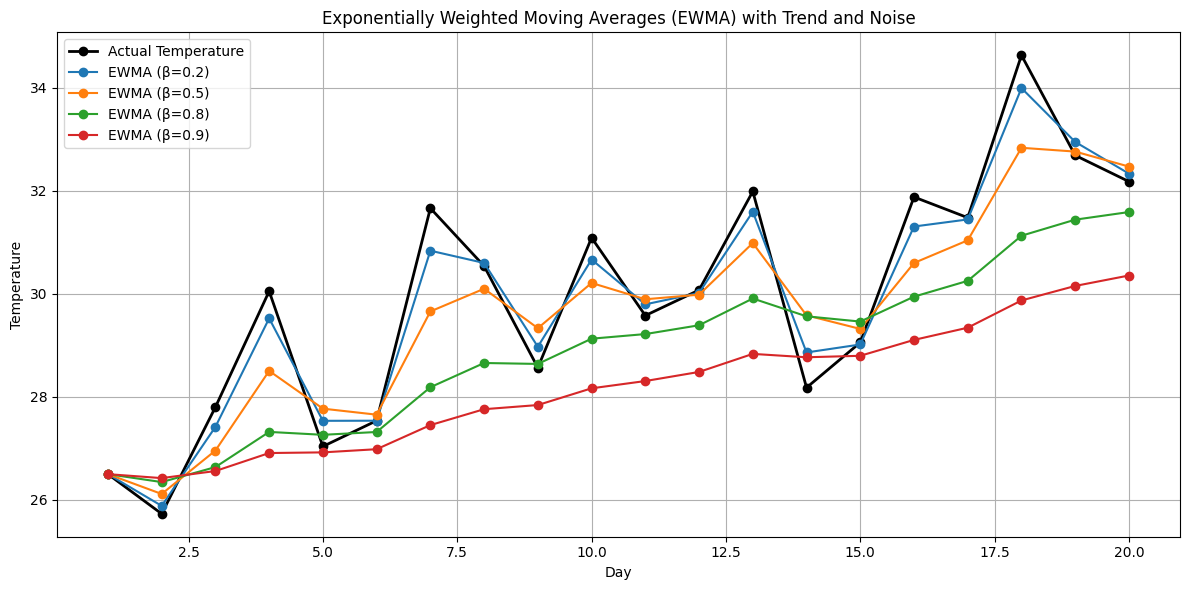

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Create trending + spiky temperature data
days = np.arange(1, 21)
trend = 25 + 0.5 * days                     # Linear warming trend
noise = np.random.normal(0, 2, size=20)     # Add noise (spikes)
temperatures = trend + noise

df = pd.DataFrame({
    'Day': days,
    'Temperature': temperatures
})

# Manual EWMA Calculation for first 5 days using β = 0.8
beta_manual = 0.8
manual_ewma = []
actuals = df['Temperature'].values
s_prev = actuals[0]  # Initialize S0 = x0
manual_ewma.append(s_prev)

for t in range(1, 5):  # Only first 5 days for demo
    s_t = beta_manual * s_prev + (1 - beta_manual) * actuals[t]
    manual_ewma.append(round(s_t, 2))
    s_prev = s_t

print("Manual EWMA Calculation for first 5 days (β = 0.8):")
for i in range(5):
    print(f"Day {i+1}: Actual = {round(actuals[i], 2)}, EWMA = {manual_ewma[i]}")

# Plot EWMA with different beta values
betas = [0.2, 0.5, 0.8,0.9]
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Temperature'], marker='o', label='Actual Temperature', color='black', linewidth=2)

for beta in betas:
    ewma = []
    s_prev = actuals[0]
    ewma.append(s_prev)
    for t in range(1, len(actuals)):
        s_t = beta * s_prev + (1 - beta) * actuals[t]
        ewma.append(s_t)
        s_prev = s_t
    plt.plot(df['Day'], ewma, marker='o', label=f"EWMA (β={beta})")

plt.title("Exponentially Weighted Moving Averages (EWMA) with Trend and Noise")
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Let's walk through how to manually **substitute values into the EWMA formula**

$[
v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot x_t
]$

Where:
- $( v_t )$ is the EWMA at time $( t )$
- $( \beta )$ is the smoothing factor (e.g., 0.8)
- $( x_t )$ is the actual value at time $( t )$
- $( v_{t-1} )$ is the EWMA from the previous time step

---

###  Manual Calculation Example

Let's assume:
- β = 0.8  
- Actual temperatures for the first 5 days:  
  `x = [26.0, 26.4, 27.9, 28.4, 30.3]` (from previous code output)

Let’s compute EWMA step by step:

####  Day 1 (t = 1):
We initialize EWMA with the first value:

$[
v_1 = x_1 = 26.0
]$

####  Day 2 (t = 2):
$[
v_2 = 0.8 \cdot v_1 + (1 - 0.8) \cdot x_2  
= 0.8 \cdot 26.0 + 0.2 \cdot 26.4  
= 20.8 + 5.28 = 26.08
]$

####  Day 3 (t = 3):
$[
v_3 = 0.8 \cdot v_2 + 0.2 \cdot x_3  
= 0.8 \cdot 26.08 + 0.2 \cdot 27.9  
= 20.864 + 5.58 = 26.44
]$

####  Day 4 (t = 4):
$[
v_4 = 0.8 \cdot v_3 + 0.2 \cdot x_4  
= 0.8 \cdot 26.44 + 0.2 \cdot 28.4  
= 21.152 + 5.68 = 26.83
]$

####  Day 5 (t = 5):
$[
v_5 = 0.8 \cdot v_4 + 0.2 \cdot x_5  
= 0.8 \cdot 26.83 + 0.2 \cdot 30.3  
= 21.464 + 6.06 = 27.52
]$

---

###  Final EWMA values for β = 0.8:
| Day | Actual (x) | EWMA (v) |
|-----|-------------|-----------|
| 1   | 26.00       | 26.00     |
| 2   | 26.40       | 26.08     |
| 3   | 27.90       | 26.44     |
| 4   | 28.40       | 26.83     |
| 5   | 30.30       | 27.52     |



In [7]:
df

,Day,Temperature
0,1,26.493428
1,2,25.723471
2,3,27.795377
3,4,30.046060
4,5,27.031693
5,6,27.531726
6,7,31.658426
7,8,30.534869
8,9,28.561051
9,10,31.085120


EWMA (Exponentially Weighted Moving Average) is a powerful tool used to **smooth out noisy data** and **highlight trends** over time by giving **more weight to recent observations** while not completely discarding older ones.

---

###  **Uses of EWMA**

#### 1. **Trend Smoothing**
- Removes short-term fluctuations and makes long-term trends clearer.
- Especially useful when monitoring training metrics like **loss or accuracy** in machine learning.

#### 2. **Training Monitoring (in Deep Learning)**
- EWMA is often applied to **loss curves** or **validation accuracy** to:
  - Avoid overreacting to noisy mini-batch updates.
  - See whether the model is genuinely improving.

#### 3. **Time Series Analysis**
- Helps detect **shifts or drifts** in financial data, sensor signals, etc.
- Often used in **stock market** analysis to identify momentum.

#### 4. **Anomaly Detection**
- Sudden deviations from the smoothed value (EWMA line) can indicate **outliers or faults** in systems.

#### 5. **Optimization Algorithms**
- Some gradient descent variants like **Adam** and **RMSProp** internally use EWMA to average gradients or squared gradients to stabilize learning.

---
